## Option 2: Pymaceuticals Inc


While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


In [1]:
#BRING IN DEPENDENCIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

## Data Management

In [2]:
#READ IN DATA
trials = pd.read_csv("raw_data/clinicaltrial_data.csv")
mice = pd.read_csv("raw_data/mouse_drug_data.csv")
print(trials.head())
print(mice.head())
mice.describe()


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn


,Mouse ID,Drug
count,250,250
unique,249,10
top,g989,Infubinol
freq,2,25


In [3]:
#MERGE THE TWO DATASETS SO WE HAVE ALL OF THE DATA IN ONE PLACE
combined = pd.merge(trials, mice, on = "Mouse ID", how="inner")
print(combined.describe())
combined.head()

         Timepoint  Tumor Volume (mm3)  Metastatic Sites
count  1906.000000         1906.000000       1906.000000
mean     19.538300           50.468120          1.018363
std      14.064786            8.869571          1.135991
min       0.000000           22.050126          0.000000
25%       5.000000           45.000000          0.000000
50%      20.000000           48.991921          1.000000
75%      30.000000           56.288484          2.000000
max      45.000000           78.567014          4.000000


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#CREATE A SUMMARY DATASET BY DRUG AND TIME - WITH KEY VARIABLESbytime["Metastatic Std. Error"] = bytime_group["Metastatic Sites"].sem()
bydrug_group = combined.groupby(by = ["Drug","Timepoint"])
bytime_group = combined.groupby(by = ["Drug","Timepoint"])
bytime = pd.DataFrame(bytime_group[["Metastatic Sites", "Tumor Volume (mm3)"]].mean())
bytime["meta_se"] = bytime_group["Metastatic Sites"].sem()
bytime["tumor_se"] = bytime_group["Tumor Volume (mm3)"].sem()
bytime["Survivors"] = bytime_group["Mouse ID"].nunique() 
bytime.reset_index(level = None, inplace = True)

In [5]:
#Check Datasets
print(bytime.describe())
bytime.head()

        Timepoint  Metastatic Sites  Tumor Volume (mm3)     meta_se  \
count  100.000000        100.000000          100.000000  100.000000   
mean    22.500000          1.219386           52.345216    0.190120   
std     14.433757          0.900441            8.980674    0.104712   
min      0.000000          0.000000           34.955595    0.000000   
25%     10.000000          0.453934           45.000000    0.115261   
50%     22.500000          1.105556           51.444575    0.183529   
75%     35.000000          1.934375           59.813482    0.266561   
max     45.000000          3.363636           70.662958    0.433903   

         tumor_se   Survivors  
count  100.000000  100.000000  
mean     0.691003   18.960000  
std      0.428934    4.720298  
min      0.000000    7.000000  
25%      0.359038   15.000000  
50%      0.705595   20.000000  
75%      0.999683   23.000000  
max      1.888586   25.000000  


,Drug,Timepoint,Metastatic Sites,Tumor Volume (mm3),meta_se,tumor_se,Survivors
0,Capomulin,0,0.000000,45.000000,0.000000,0.000000,25
1,Capomulin,5,0.160000,44.266086,0.074833,0.448593,25
2,Capomulin,10,0.320000,43.084291,0.125433,0.702684,25
3,Capomulin,15,0.375000,42.064317,0.132048,0.838617,24
4,Capomulin,20,0.652174,40.716325,0.161621,0.909731,23


## Scatterplot - Tumor Volume over Time by Treatment

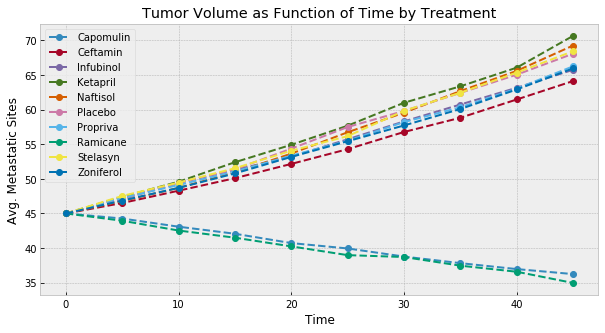

In [6]:
# RESHAPE RELEVANT DATA SO EACH COLUMN IS A DRUG
outcome = bytime.pivot(index='Timepoint', columns='Drug', values = 'Tumor Volume (mm3)')
outcome.reset_index(level = None, inplace = True)

#PRODUCE PLOT
plt.figure(figsize = (10, 5))

for col in outcome:
    if col != "Timepoint" :
        plt.errorbar(outcome['Timepoint'], outcome[col],   fmt='--o', label = col )        
        #plt.scatter(outcome['Timepoint'], outcome[col], linewidth = 0.2)        
plt.ylabel('Avg. Metastatic Sites')
plt.xlabel('Time')
plt.title('Tumor Volume as Function of Time by Treatment')
plt.legend()       
plt.show()

## Scatterplot - Metastatic Sites over Time by Treatment

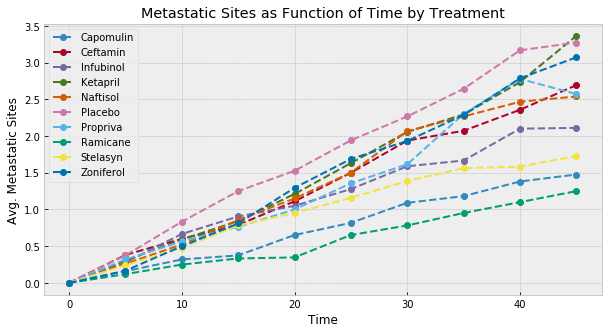

In [7]:
# RESHAPE RELEVANT DATA SO EACH COLUMN IS A DRUG
outcome = bytime.pivot(index='Timepoint', columns='Drug', values = 'Metastatic Sites')
outcome.reset_index(level = None, inplace = True)

#PRODUCE PLOT
plt.figure(figsize = (10, 5))

for col in outcome:
    if col != "Timepoint" :
        plt.errorbar(outcome['Timepoint'], outcome[col],   fmt='--o', label = col )        
        #plt.scatter(outcome['Timepoint'], outcome[col], linewidth = 0.2)        
plt.ylabel('Avg. Metastatic Sites')
plt.xlabel('Time')
plt.title('Metastatic Sites as Function of Time by Treatment')
plt.legend()       
plt.show()


## Scatterplot - Survival over Time by Treatment

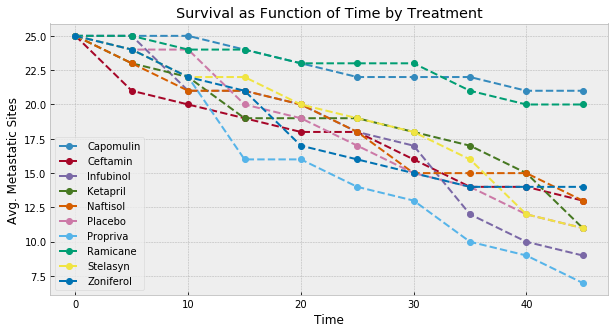

In [8]:
# RESHAPE RELEVANT DATA SO EACH COLUMN IS A DRUG
outcome = bytime.pivot(index='Timepoint', columns='Drug', values = 'Survivors')
outcome.reset_index(level = None, inplace = True)

#PRODUCE PLOT
plt.figure(figsize = (10, 5))

for col in outcome:
    if col != "Timepoint" :
        plt.errorbar(outcome['Timepoint'], outcome[col],   fmt='--o', label = col )        
        #plt.scatter(outcome['Timepoint'], outcome[col], linewidth = 0.2)        
plt.ylabel('Avg. Metastatic Sites')
plt.xlabel('Time')
plt.title('Survival as Function of Time by Treatment')
plt.legend()       
plt.show()



## Bar Graph - Total % tumor volume change by treament

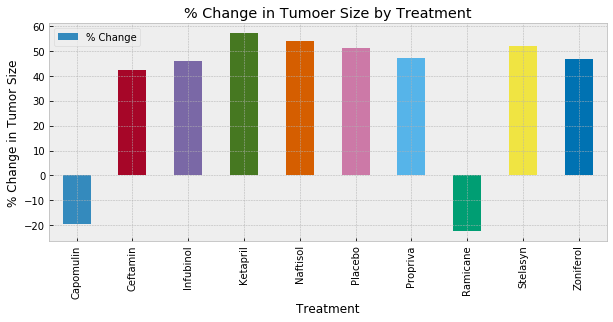

In [9]:
#PREP THE DATA
outcome = bytime.pivot(index='Timepoint', columns='Drug', values = 'Tumor Volume (mm3)')
drugs = outcome.columns.tolist()
location = np.arange(len(drugs))+1

#Calculate % Change
start = []
end = []
pctchange = []
for col in outcome:
    start.append(outcome[col].iloc[0])
    end.append(outcome[col].iloc[-1])
    pctchange.append((outcome[col].iloc[-1] / outcome[col].iloc[0] - 1 ) * 100 )
    
#Create a DataFrame
results_dict = {
    "Treatment": drugs,
    "Location": location,
    "Start": start,
    "End": end,
    "% Change": pctchange
}

results = pd.DataFrame(results_dict)

#PLOT IT
results.plot.bar(x = 'Treatment', y = '% Change', figsize = (10, 4))
plt.ylabel("% Change in Tumor Size")
plt.title("% Change in Tumoer Size by Treatment")
plt.show()

## Conclusions

We may have possible found the next big thing in cancer treatment. For our randomized control experiment, we tested the 9 drugs against a placebo. Each treatment was supplied to 25 mice each, with one group recevied a placebo.

* Two of the drugs, Capomulium and Ramicane, led to promising outcomes in reducing tumor size and in overall survival rates.


* Both of the promising candidate drugs led to a ~20% decrease in tumor size. By contrast, the tumor size of the control group and nearly every less promising drug candidate, increased by ~50%.


* Of the 25 mice that were treated with Capomulium and Ramicane, 21 (84%) and 20 (80%) mice survived, respectively. The mice in the placebo group fared much worse with only 11 (44%) surviving. The promising drugs nearly doubled the survival rate. 


* However, by the end of the trial, mice that received the Capomulium and Ramicane treatments had more metastatic sites. While the results may seem counter-intuitive, they reflect a higher survival rate. Simply put, the worse of mice in other treatments died off (leading to censored data), but those on two promising drugs were more likely to survive.

We recommend applying for a Phase I trial immediately. Hopefully, these drugs are safe for hummans, and just as effective as they are on mice. 